In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import bqplot as bq
import ipywidgets as widgets
from ipywidgets import interact, widgets
import matplotlib.colors as mcolors

In [20]:
data = pd.read_csv("https://data.illinois.gov/datastore/dump/f823a40d-77f9-4b12-9d1c-5cd0c31905e9")
data.head()

,_id,Id,Agency,Agency Division,Employee Name,Position Title,Period Pay Rate,YTD Gross
0,1,E9A7D9693C5107A3EBE21620831F454B2C6A39F2,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,KAREN RISINGER,ACCOUNT TECHNICIAN II,2200,11000
1,2,A37FC1DBC2E0BEFF02BC71A0A49ABF0ECAD89686,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,BRIAN DANAHA,BUILDING/GROUNDS LABORER,2200,58300
2,3,C1F5449D622DAD5071CA0BACD6EA92B1AB9F1B44,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,JAMES JONES,BUILDING/GROUNDS LABORER,3300,52200
3,4,74C2BEB0019EA738BC3F69191757ACA446612249,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,STEVE FALICA,BUILDING/GROUNDS LABORER,4900,92700
4,5,349727DEDB98A601C3F28374F12F9945093ACE55,ABE LINCOLN PRES LIBRARY & MUS,ALPLM FTE EMPLOYEES,STEVEN BRAMBLETT,BUILDING/GROUNDS LABORER,2400,34200


/var/folders/kl/l78dml_d5ys7ch5n72qw8yq80000gn/T/ipykernel_72456/3583980442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Period Pay Rate'] = pd.to_numeric(cleaned_data['Period Pay Rate'], errors='coerce')
/var/folders/kl/l78dml_d5ys7ch5n72qw8yq80000gn/T/ipykernel_72456/3583980442.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['YTD Gross'] = pd.to_numeric(cleaned_data['YTD Gross'], errors='coerce')


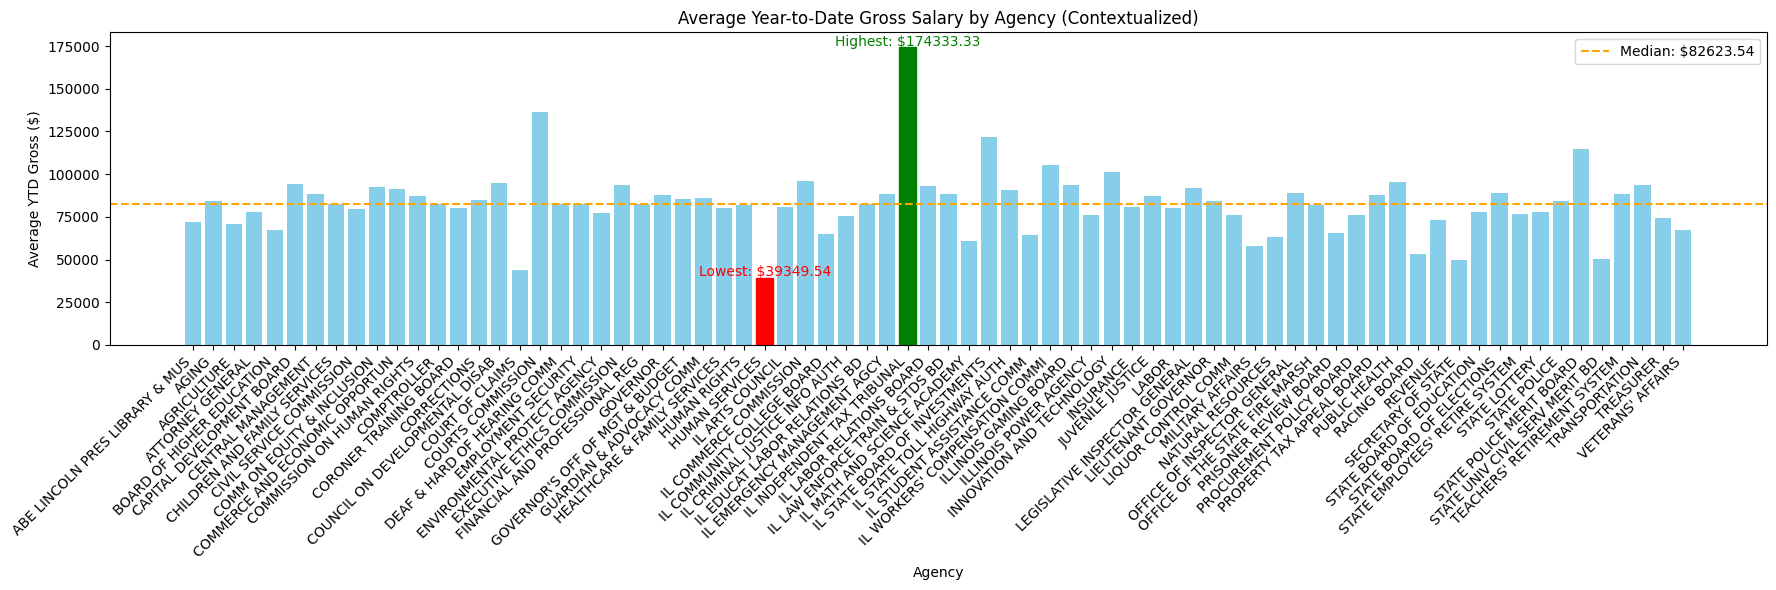

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning: Drop rows with NaN or invalid values in key columns
cleaned_data = data.dropna(subset=['Period Pay Rate', 'YTD Gross', 'Position Title'])

# Ensure numeric data is properly formatted
cleaned_data['Period Pay Rate'] = pd.to_numeric(cleaned_data['Period Pay Rate'], errors='coerce')
cleaned_data['YTD Gross'] = pd.to_numeric(cleaned_data['YTD Gross'], errors='coerce')

# Drop rows with invalid numeric data
cleaned_data = cleaned_data.dropna(subset=['Period Pay Rate', 'YTD Gross'])

# Bar Chart: Average YTD Gross by Agency
agency_avg_pay = cleaned_data.groupby('Agency', as_index=False)['YTD Gross'].mean()

# Identify agencies with the highest and lowest average YTD Gross
highest_agency = agency_avg_pay.loc[agency_avg_pay['YTD Gross'].idxmax()]
lowest_agency = agency_avg_pay.loc[agency_avg_pay['YTD Gross'].idxmin()]

# Calculate the median YTD Gross
median_ytd_gross = agency_avg_pay['YTD Gross'].median()

# Plotting Average YTD Gross by Agency
plt.figure(figsize=(18, 6))
bars = plt.bar(agency_avg_pay['Agency'], agency_avg_pay['YTD Gross'], color='skyblue')

# Highlight highest and lowest bars
bars[agency_avg_pay['YTD Gross'].idxmax()].set_color('green')
bars[agency_avg_pay['YTD Gross'].idxmin()].set_color('red')

# Add annotations for the highest and lowest
plt.text(
    highest_agency['Agency'],
    highest_agency['YTD Gross'] + 1000,
    f"Highest: ${highest_agency['YTD Gross']:.2f}",
    ha='center',
    color='green'
)
plt.text(
    lowest_agency['Agency'],
    lowest_agency['YTD Gross'] + 1000,
    f"Lowest: ${lowest_agency['YTD Gross']:.2f}",
    ha='center',
    color='red'
)

# Add a median line
plt.axhline(y=median_ytd_gross, color='orange', linestyle='--', label=f"Median: ${median_ytd_gross:.2f}")

# Titles and labels
plt.title('Average Year-to-Date Gross Salary by Agency (Contextualized)')
plt.xlabel('Agency')
plt.ylabel('Average YTD Gross ($)')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()
